In [2]:
import numpy as np# for computation
import pandas as pd #for data manipulation and analyasis
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt   # For visualization
from sklearn.feature_extraction.text import CountVectorizer

import pickle

In [3]:
pip install emoji


Note: you may need to restart the kernel to use updated packages.


In [4]:
sns.set(style='ticks', context='talk')
na_values = ['NO CLUE', 'N/A', '0']

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

In [5]:


ytdspam_psy = pd.read_csv(r'D:\TE code\New folder\final\Youtube01-Psy.csv')
ytdspam_psy.head()
ytdspam_psy.shape

ytdspam_kattyparry = pd.read_csv(r'D:\TE code\New folder\final\Youtube02-KatyPerry.csv')
ytdspam_kattyparry.head()
ytdspam_kattyparry.shape

ytdspam_LMFAO = pd.read_csv(r'D:\TE code\New folder\final\Youtube03-LMFAO.csv')
ytdspam_LMFAO.head()
ytdspam_LMFAO.shape

ytdspam_Emnm = pd.read_csv(r'D:\TE code\New folder\final\Youtube04-Eminem.csv')
ytdspam_Emnm.head()
ytdspam_Emnm.shape



ytd_data = pd.concat([ytdspam_psy,ytdspam_kattyparry,ytdspam_LMFAO,ytdspam_Emnm,])
ytd_data.head()
ytd_data.shape
ytd_data.loc[:,'CONTENT':'CLASS'].head()


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: kobyoshi02",1
1,"Hey guys check out my new channel and our first vid THIS IS US THE MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment and please subscribe!!!!",1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
import pandas as pd

total_comments = ytd_data.shape[0]

print("Total number of comments:", total_comments)

Total number of comments: 1586


In [7]:
def update_spam_match_with_ngrams(spam_match, new_words):
    # Combine existing and new words
    updated_spam_match = spam_match.copy()
    updated_spam_match.extend(new_words)
    
    if new_words and any(new_words):
        # Ensure new_words is always a list
        if isinstance(new_words, str):
            new_words = [new_words]
        
        # Generate n-grams for new phrases (not for single words)
        for phrase in new_words:
            if ' ' in phrase:  # Check if the string is a phrase
                # Determine the maximum n-gram length based on the phrase length
                max_n = len(phrase.split())
                for n in range(1, max_n + 1):
                    vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word', stop_words=None)
                    ngrams = vectorizer.fit_transform([phrase]).toarray()
                    ngram_features = vectorizer.get_feature_names_out()
                    
                    # Add n-grams to the spam match list
                    updated_spam_match.extend(ngram_features)
    
    # Remove duplicates by converting to a set and back to a list
    updated_spam_match = list(set(updated_spam_match))
    
    return updated_spam_match


def add_words_dynamically(spam_match):
    """
    Allows user to add new spam words dynamically to the spam match list.
    
    Args:
    spam_match (list): Original list of spam words/phrases.
    
    Returns:
    list: Updated list of spam words/phrases.
    """
    while True:
        action = input("Would you like to add or delete a word/phrase? (Enter 'add', 'delete', or 'done' to finish): ").strip().lower()
        if action == 'done':
            break
        elif action == 'add':
            word = input("Enter a new spam word/phrase: ").strip()
            if word:
                spam_match = update_spam_match_with_ngrams(spam_match, [word])
            else:
                print("Please provide a non-empty word.")
        elif action == 'delete':
            word = input("Enter the spam word/phrase to delete: ").strip()
            if word in spam_match:
                spam_match = [w for w in spam_match if w != word]
            else:
                print(f"'{word}' not found in the spam match list.")
        else:
            print("Invalid action. Please enter 'add', 'delete', or 'done'.")
    
    return spam_match

# Example usage
spam_match = ["check my video", "Follow me", "watch my videos", "subscribe", "Please share", "Check out", "my channel", "my page", "giftcard", "promos", "sex", "channel","facebook", "soundcloud", "support", "website"]

# Allow user to add or delete words dynamically
spam_match = add_words_dynamically(spam_match)

# Print the updated spam_match list
print("Updated spam match list:")
print(spam_match)
print("\nNo. of words in spam match:")
print(len(spam_match))


Would you like to add or delete a word/phrase? (Enter 'add', 'delete', or 'done' to finish):  done


Updated spam match list:
['check my video', 'Follow me', 'watch my videos', 'subscribe', 'Please share', 'Check out', 'my channel', 'my page', 'giftcard', 'promos', 'sex', 'channel', 'facebook', 'soundcloud', 'support', 'website']

No. of words in spam match:
16


In [8]:
ytd_data['IS_URL'] = ytd_data['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))
ytd_data.shape
ytd_data['IS_URL']
IS_URL_total = ytd_data['IS_URL'].sum()



In [9]:
# Count the number of spam words in the comment using the spam dictionary
ytd_data['SPM_CNT'] = ytd_data['CONTENT'].str.upper().str.count(str.upper("|".join(spam_match)))
ytd_data.shape
ytd_data['SPM_CNT']



0      2
1      3
2      0
3      2
4      0
      ..
443    2
444    1
445    1
446    0
447    0
Name: SPM_CNT, Length: 1586, dtype: int64

In [10]:
# NLTK stop words
from nltk.corpus import stopwords
sr = set(stopwords.words('english'))



print(len(sr))
print(sr)

179
{'him', "you'll", "mightn't", 'were', 'each', 'here', 'other', 'an', 'nor', 'can', 'from', "you've", "don't", "shouldn't", 'those', 'off', 'don', 'a', 'when', 'these', 'himself', 'against', 'few', 'and', 'i', 'same', 'then', 'been', 'no', 'not', 'more', "doesn't", 'what', 'once', 'mightn', 'should', 'do', 'it', "aren't", 'which', 'at', 'who', "wasn't", 'll', "haven't", 'didn', 'only', "didn't", 'ain', 's', 'wasn', 'so', 've', 'until', 'me', 'with', 'any', 'if', 'mustn', 'haven', "should've", "hadn't", 'isn', 're', "you'd", 'ourselves', 'am', 'aren', 'couldn', 'his', 'ours', 'd', 'where', 'during', 'them', 'has', 'too', 'won', 'had', 'hasn', 'have', 'very', 'whom', 'being', 'that', 'than', 'she', 'yourself', 'up', 'ma', 'yourselves', 'did', 'weren', "hasn't", 'y', 'be', 'we', "couldn't", 'does', 'herself', 'such', 'after', 'of', 'down', 'is', 'again', 'between', 'how', 'wouldn', 'the', "wouldn't", 'to', 'they', 'her', 'out', 'shan', 'under', 'themselves', "you're", 'over', 'shouldn'

In [11]:

#%%
ytd_data['CONTENT_FLTR'] = ytd_data['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in sr])
ytd_data['CONTENT_FLTR']

ytd_data['COMMENT_LEN'] =  ytd_data['CONTENT_FLTR'].str.len()
ytd_data['COMMENT_LEN']

ytd_data.loc[:,['CONTENT','CONTENT_FLTR']].head()

ytd_data['SPM_to_COMNT'] = (ytd_data['SPM_CNT']/ytd_data['COMMENT_LEN'])
ytd_data['SPM_to_COMNT']

ytd_data['spm_len'] = np.where(ytd_data['COMMENT_LEN'] > 50, 1, 0)
ytd_data['spm_len']
ytd_data['spm_len'].unique()

import emoji

# Word Count
ytd_data['WORD_COUNT'] = ytd_data['CONTENT_FLTR'].apply(len)

# Character Count
ytd_data['CHARACTER_COUNT'] = ytd_data['CONTENT'].apply(len)

# Contains Numbers
ytd_data['CONTAINS_NUMBERS'] = ytd_data['CONTENT'].str.contains(r'\d', regex=True).astype(int)

# Contains Emojis
ytd_data['CONTAINS_EMOJIS'] = ytd_data['CONTENT'].apply(lambda x: emoji.emoji_count(x))

# Contains Punctuation
import string
ytd_data['CONTAINS_PUNCTUATION'] = ytd_data['CONTENT'].apply(lambda x: any(char in string.punctuation for char in x)).astype(int)

# Contains All Caps
ytd_data['CONTAINS_ALL_CAPS'] = ytd_data['CONTENT'].apply(lambda x: any(word.isupper() for word in x.split())).astype(int)


ytd_data.columns
list(ytd_data.columns.values)

['COMMENT_ID',
 'AUTHOR',
 'DATE',
 'CONTENT',
 'CLASS',
 'IS_URL',
 'SPM_CNT',
 'CONTENT_FLTR',
 'COMMENT_LEN',
 'SPM_to_COMNT',
 'spm_len',
 'WORD_COUNT',
 'CHARACTER_COUNT',
 'CONTAINS_NUMBERS',
 'CONTAINS_EMOJIS',
 'CONTAINS_PUNCTUATION',
 'CONTAINS_ALL_CAPS']

In [12]:
#%%Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

NB = GaussianNB()

# Train the model using the training sets 
NB.fit(ytd_data.values[:,(5,6,8,9,10,11,12,13,14,15,16)],ytd_data.CLASS)## error

ytdspam_shakira = pd.read_csv(r'D:\TE code\New folder\\final\Youtube05-Shakira.csv')

ytdspam_shakira.shape

# Count the number of spam words in the comment using the spam dictionary
ytdspam_shakira['SPM_CNT'] = ytdspam_shakira['CONTENT'].str.upper().str.count(str.upper("|".join(spam_match)))

ytdspam_shakira['IS_URL'] = ytdspam_shakira['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))

ytdspam_shakira['CONTENT_FLTR'] = ytdspam_shakira['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in sr])

ytdspam_shakira['COMMENT_LEN'] =  ytdspam_shakira['CONTENT_FLTR'].str.len()

ytdspam_shakira['SPM_to_COMNT'] = (ytdspam_shakira['SPM_CNT']/ytdspam_shakira['COMMENT_LEN'])

ytdspam_shakira['spm_len'] = np.where(ytdspam_shakira['COMMENT_LEN'] > 50, 1, 0)

import emoji

# Word Count
ytdspam_shakira['WORD_COUNT'] = ytdspam_shakira['CONTENT_FLTR'].apply(len)

# Character Count
ytdspam_shakira['CHARACTER_COUNT'] = ytdspam_shakira['CONTENT'].apply(len)

# Contains Numbers
ytdspam_shakira['CONTAINS_NUMBERS'] = ytdspam_shakira['CONTENT'].str.contains(r'\d', regex=True).astype(int)

# Contains Emojis
ytdspam_shakira['CONTAINS_EMOJIS'] = ytdspam_shakira['CONTENT'].apply(lambda x: emoji.emoji_count(x))

# Contains Punctuation
import string
ytdspam_shakira['CONTAINS_PUNCTUATION'] = ytdspam_shakira['CONTENT'].apply(lambda x: any(char in string.punctuation for char in x)).astype(int)

# Contains All Caps
ytdspam_shakira['CONTAINS_ALL_CAPS'] = ytdspam_shakira['CONTENT'].apply(lambda x: any(word.isupper() for word in x.split())).astype(int)


ytdspam_shakira.head()


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,SPM_CNT,IS_URL,CONTENT_FLTR,COMMENT_LEN,SPM_to_COMNT,spm_len,WORD_COUNT,CHARACTER_COUNT,CONTAINS_NUMBERS,CONTAINS_EMOJIS,CONTAINS_PUNCTUATION,CONTAINS_ALL_CAPS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0,0,False,"[nice, song﻿]",2,0.0,0,2,10,0,0,0,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0,0,False,"[love, song, ﻿]",3,0.0,0,3,13,0,0,0,1
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0,0,False,"[love, song, ﻿]",3,0.0,0,3,13,0,0,0,1
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach one billion!! Share it and replay it! ﻿",0,0,False,"[860,000,000, lets, make, first, female, reach, one, billion!!, share, replay, it!, ﻿]",12,0.0,0,12,86,1,0,1,0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0,0,False,"[shakira, best, worldcup﻿]",3,0.0,0,3,29,0,0,0,0


In [13]:
total_comSH = ytdspam_shakira.shape[0]
print("Total number of comments:",total_comSH )

Total number of comments: 370


Accuracy: 0.9216216216216216


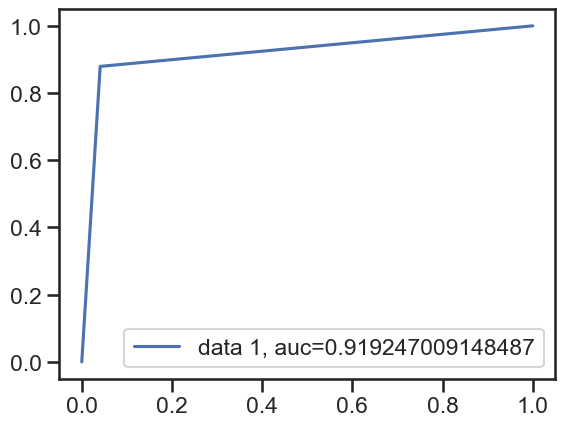

In [14]:


#ytdspam_shakira.values[:,(5,6,8,9,10)]

# Predict the test data with NB Model
predicted = NB.predict(ytdspam_shakira.values[:,(5,6,8,9,10,11,12,13,14,15,16)])
predicted

from sklearn.metrics import accuracy_score

ytdspam_shakira.values[:,4]

from sklearn.metrics import confusion_matrix
confusion_matrix(ytdspam_shakira.CLASS, predicted)

ac=accuracy_score(ytdspam_shakira.CLASS, predicted, normalize = True)


from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(ytdspam_shakira.CLASS,  predicted)
auc = metrics.roc_auc_score(ytdspam_shakira.CLASS,  predicted)
print("Accuracy:", ac)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()




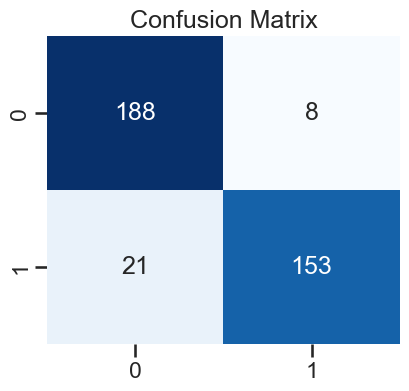

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original Confusion Matrix
original_cfm = confusion_matrix(ytdspam_shakira.CLASS, predicted)


# Plotting the confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(original_cfm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')


plt.show()


Accuracy Score: 0.9056603773584906


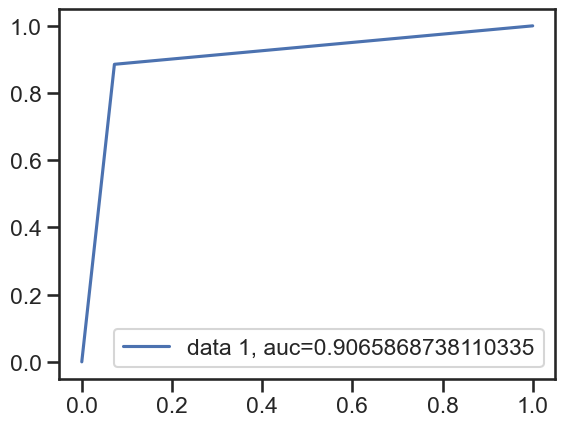

In [29]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(ytd_data.values[:, (5, 6, 8, 9, 10,11,12,13,14,15,16)], ytd_data.CLASS, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
C = 1  # SVM regularization parameter

svc = svm.SVC(kernel="rbf", C=100, gamma=0.1, probability=True).fit(X_train_scaled, y_train)

# Predict on test set
predicted_svm = svc.predict(X_test_scaled)

# Calculating accuracy score
acc_score = accuracy_score(y_test, predicted_svm)
print("Accuracy Score:", acc_score)


# Generating ROC curve
fpr, tpr, _ = roc_curve(y_test, predicted_svm)
auc = roc_auc_score(y_test, predicted_svm)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


Confusion Matrix:
[[141  11]
 [ 19 147]]


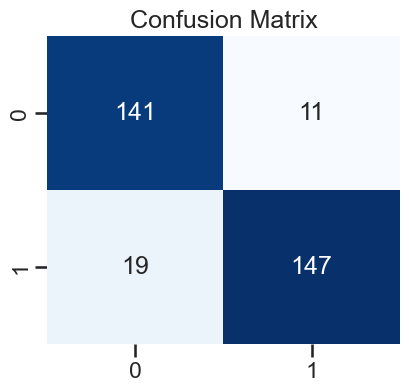

In [30]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_svm)
print("Confusion Matrix:")
print(conf_matrix)
# Plotting the confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')


plt.show()

Accuracy: 0.9


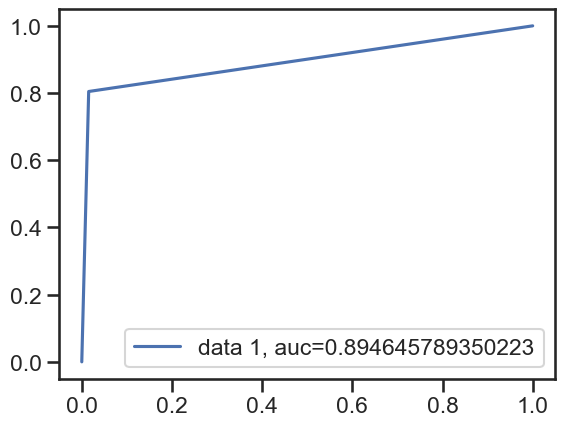

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

model_DecisionTree = DecisionTreeClassifier(criterion='gini', random_state=40)
model_DecisionTree = model_DecisionTree.fit(ytd_data.values[:,(5,6,8,9,10)], ytd_data.CLASS)

predicted_DT = model_DecisionTree.predict(ytdspam_shakira.values[:,(5,6,8,9,10)])

# Calculate accuracy
accuracy = accuracy_score(ytdspam_shakira.CLASS, predicted_DT)
print("Accuracy:", accuracy)



# ROC curve and AUC
fpr, tpr, _ = roc_curve(ytdspam_shakira.CLASS, predicted_DT)
auc = roc_auc_score(ytdspam_shakira.CLASS, predicted_DT)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


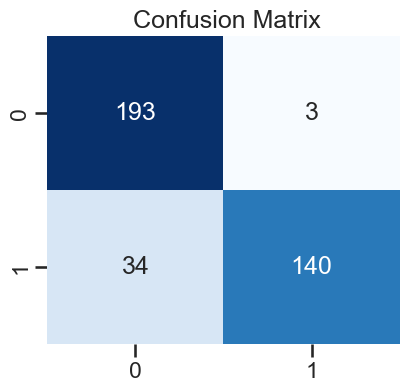

In [31]:


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Original Confusion Matrix
original_cfm = confusion_matrix(ytdspam_shakira.CLASS, predicted_DT)

# New Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(original_cfm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(' Confusion Matrix')



plt.show()


Accuracy for Logistic Regression: 0.918918918918919


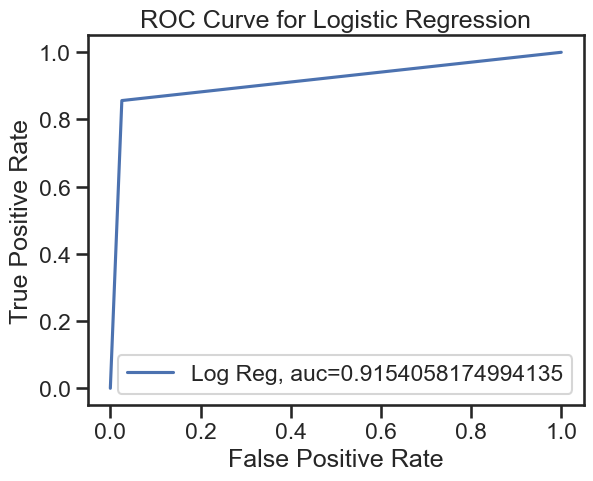

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier = classifier.fit(ytd_data.values[:,(5,6,8,9,10,11,12,13,14,15,16)], ytd_data.CLASS)

# Predict using Logistic Regression
predicted_LR = classifier.predict(ytdspam_shakira.values[:,(5,6,8,9,10,11,12,13,14,15,16)])



# Accuracy score
accuracy_LR = accuracy_score(ytdspam_shakira.CLASS, predicted_LR)
print("Accuracy for Logistic Regression:", accuracy_LR)

# ROC curve and AUC
fpr_LR, tpr_LR, _ = roc_curve(ytdspam_shakira.CLASS, predicted_LR)
auc_LR = roc_auc_score(ytdspam_shakira.CLASS, predicted_LR)
plt.plot(fpr_LR, tpr_LR, label="Log Reg, auc="+str(auc_LR))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.show()


Confusion Matrix for Logistic Regression:
[[191   5]
 [ 25 149]]


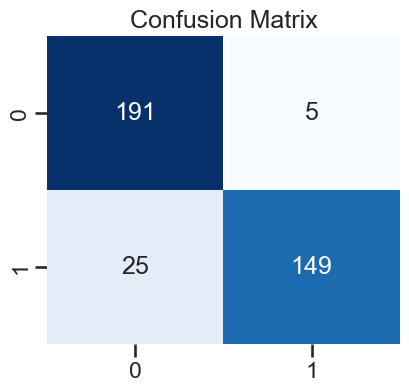

In [33]:
# Confusion matrix
conf_matrix_LR = confusion_matrix(ytdspam_shakira.CLASS, predicted_LR)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_LR)
# Plotting the confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_LR, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')


plt.show()

[('log', LogisticRegression(max_iter=1000)), ('cart', DecisionTreeClassifier(random_state=40)), ('svm', SVC(C=100, gamma=0.1, probability=True)), ('nb', GaussianNB())]
Accuracy (Hard Voting): 0.8837837837837837


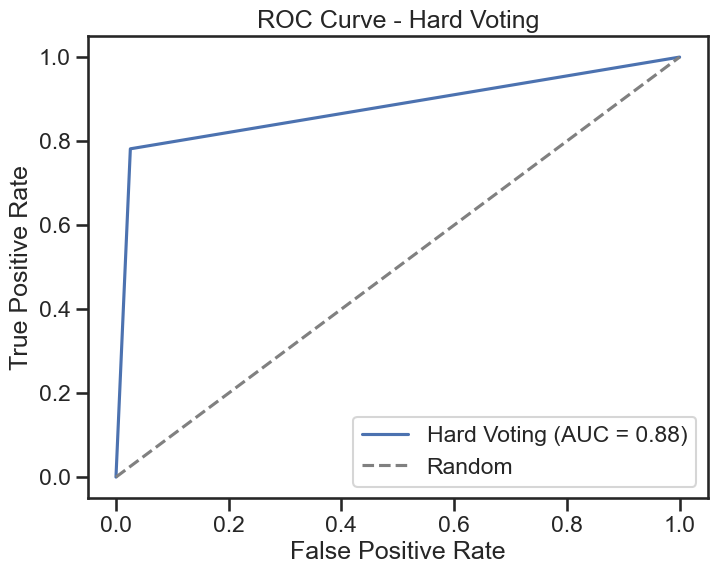



Accuracy (Soft Voting): 0.8972972972972973


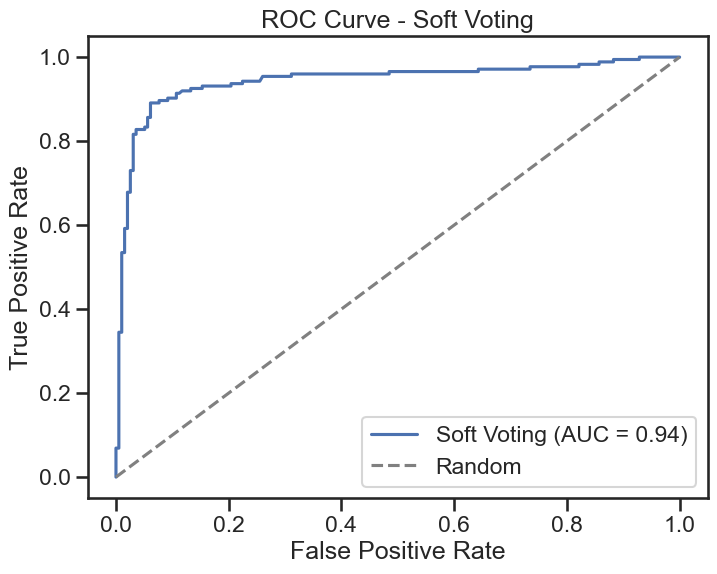

In [37]:
# Proper Ensemble Modelling

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create sub-models
estimators = []

# Model 1: Logistic Regression
model1 = classifier
estimators.append(('log', model1))

# Model 2: Decision Tree Classifier
model2 = model_DecisionTree
estimators.append(('cart', model2))

# Model 3: Support Vector Machine (SVM)
model3 = svc 
estimators.append(('svm', model3))

# Model 4: Gaussian Naive Bayes
model4 = NB 
estimators.append(('nb', model4))

# Display the list of sub-models
print(estimators)

# Create the ensemble model with hard voting
ensemble_hard = VotingClassifier(estimators, voting='hard')

# Train the ensemble model on the training data
ensemble_hard.fit(ytd_data.values[:,(5,6,8,9,10,11,12,13,14,15,16)], ytd_data.CLASS)

# Make predictions on the test set using the ensemble model (hard voting)
Y_pred_hard = ensemble_hard.predict(ytdspam_shakira.values[:,(5,6,8,9,10,11,12,13,14,15,16)])


# Obtain accuracy and confusion matrix for hard voting
accuracy_hard = accuracy_score(ytdspam_shakira.CLASS, Y_pred_hard)
conf_matrix_hard = confusion_matrix(ytdspam_shakira.CLASS, Y_pred_hard)

# Display accuracy and confusion matrix for hard voting
print("Accuracy (Hard Voting):", accuracy_hard)



# Plot ROC Curve for hard voting
fpr, tpr, _ = roc_curve(ytdspam_shakira.CLASS, Y_pred_hard)
auc = roc_auc_score(ytdspam_shakira.CLASS, Y_pred_hard)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Hard Voting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hard Voting')
plt.legend()
plt.show()



# Create the ensemble model with soft voting
ensemble_soft = VotingClassifier(estimators, voting='soft')

# Train the ensemble model on the training data
ensemble_soft.fit(ytd_data.values[:,(5,6,8,9,10,11,12,13,14,15,16)], ytd_data.CLASS)

# Make predictions on the test set using the ensemble model (soft voting)
Y_pred_soft = ensemble_soft.predict(ytdspam_shakira.values[:,(5,6,8,9,10,11,12,13,14,15,16)])


# Obtain accuracy, confusion matrix, and probability estimates for soft voting
accuracy_soft = accuracy_score(ytdspam_shakira.CLASS, Y_pred_soft)
conf_matrix_soft = confusion_matrix(ytdspam_shakira.CLASS, Y_pred_soft)
Y_pred_prob_soft = ensemble_soft.predict_proba(ytdspam_shakira.values[:,(5,6,8,9,10,11,12,13,14,15,16)])[:, 1]

# Display accuracy and confusion matrix for soft voting
print("\n\nAccuracy (Soft Voting):", accuracy_soft)


# Plot ROC Curve for soft voting
fpr, tpr, _ = roc_curve(ytdspam_shakira.CLASS, Y_pred_prob_soft)
auc = roc_auc_score(ytdspam_shakira.CLASS, Y_pred_prob_soft)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Soft Voting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Soft Voting')
plt.legend()
plt.show()


Accuracy: 0.8837837837837837


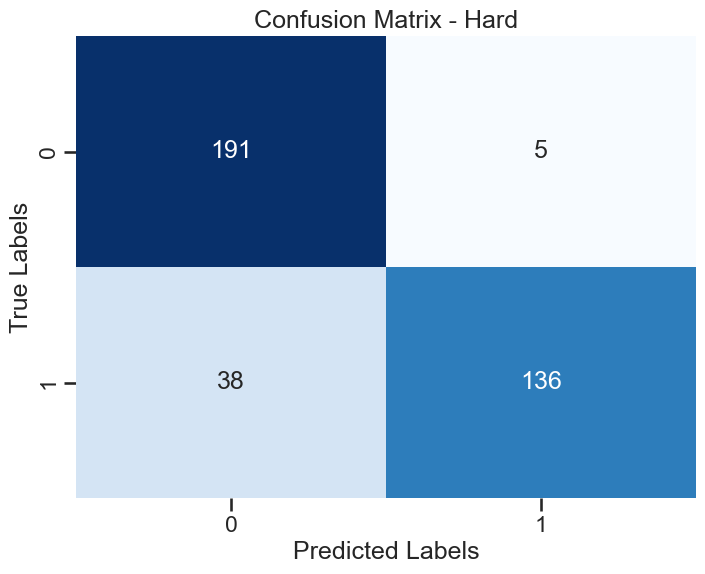

In [21]:

# Confusion matrix
cm = confusion_matrix(ytdspam_shakira.CLASS, Y_pred_hard)



# Accuracy score
print("Accuracy:", accuracy_score(ytdspam_shakira.CLASS, Y_pred_hard))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Hard")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.8972972972972973


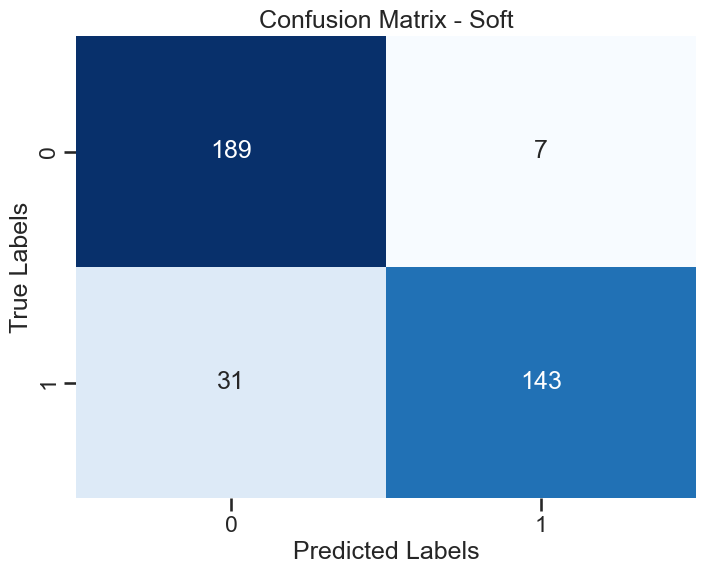

In [22]:

# Confusion matrix
cm = confusion_matrix(ytdspam_shakira.CLASS, Y_pred_soft)



# Accuracy score
print("Accuracy:", accuracy_score(ytdspam_shakira.CLASS, Y_pred_soft))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Soft")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy (Soft Voting): 0.8972972972972973
Confusion Matrix (Soft Voting):
[[189   7]
 [ 31 143]]


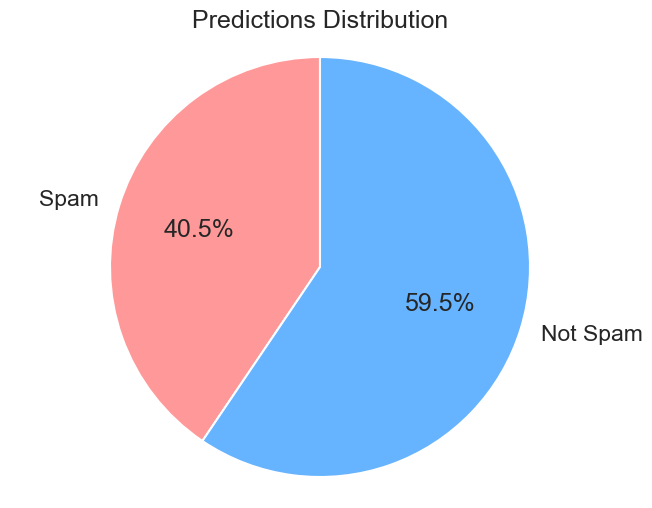

In [23]:
import matplotlib.pyplot as plt

# Function to generate pie chart
def generate_pie_chart(predictions):
    spam_count = sum(predictions)
    not_spam_count = len(predictions) - spam_count
    labels = ['Spam', 'Not Spam']
    sizes = [spam_count, not_spam_count]
    colors = ['#ff9999','#66b3ff']
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Predictions Distribution')
    plt.axis('equal')
    plt.show()

# Assuming ytdspam_shakira is the user-selected testing dataset
# Make predictions on the test set using the ensemble model (soft voting)
Y_pred_soft = ensemble_soft.predict(ytdspam_shakira.values[:,(5,6,8,9,10,11,12,13,14,15,16)])

# Display accuracy and confusion matrix for soft voting
print("Accuracy (Soft Voting):", accuracy_soft)
print("Confusion Matrix (Soft Voting):")
print(conf_matrix_soft)



# Generate pie chart for predictions distribution
generate_pie_chart(Y_pred_soft)


Option 1 - Estimators for Hard Voting:
 [('log', LogisticRegression(max_iter=1000)), ('cart', DecisionTreeClassifier(random_state=40)), ('svm', SVC(C=100, gamma=0.1, probability=True)), ('nb', GaussianNB())]

Option 2 - Estimators for Soft Voting (All Models):
 [('log', LogisticRegression(max_iter=1000)), ('cart', DecisionTreeClassifier(random_state=40)), ('svm', SVC(C=100, gamma=0.1, probability=True)), ('nb', GaussianNB())]

Option 3 - Estimators for Soft Voting (Logistic Regression and Gaussian Naive Bayes Only):
 [('log', LogisticRegression(max_iter=1000)), ('nb', GaussianNB())]



Choose voting option (1 for Hard Voting, 2 for Soft Voting, 3 for Soft Voting with Logistic Regression and Gaussian Naive Bayes only):  1



Please choose a dataset for training and testing:
1. Dataset A (ytd_data and ytdspam_shakira)
2. Dataset B (your_dataset_name)



Enter the dataset option (1 or 2):  1



Accuracy (Hard Voting): 0.8837837837837837

Confusion Matrix (Hard Voting):



 [[191   5]
 [ 38 136]]


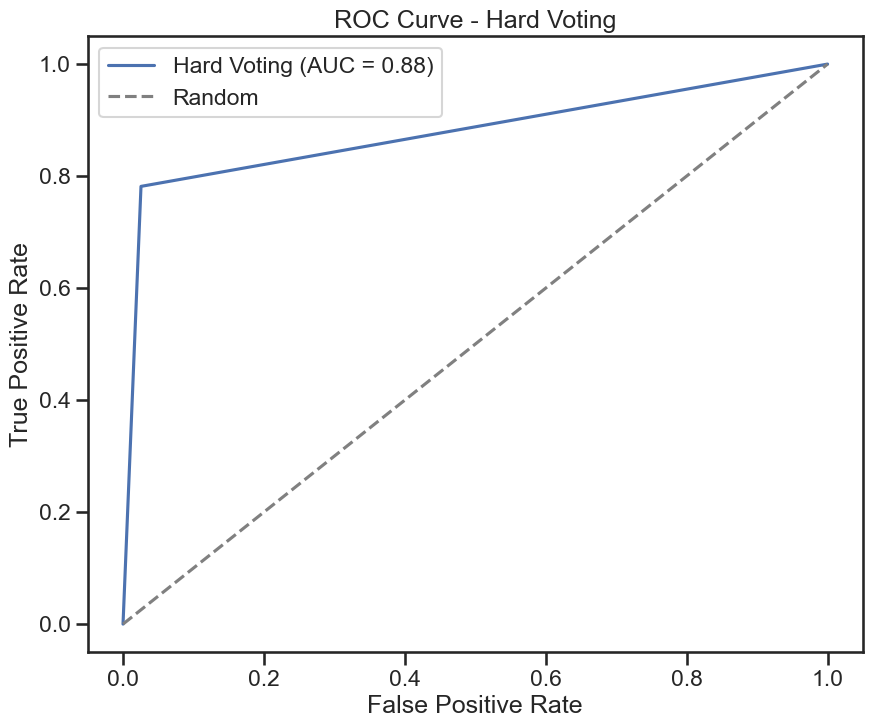

In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create sub-models for all options
estimators_option1 = [(('log', model1)), (('cart', model2)), (('svm', model3)), (('nb', model4))]

estimators_option2 = [(('log', model1)), (('cart', model2)), (('svm', model3)),( ('nb', model4))]

estimators_option3 = [(('log', model1)), (('nb', model4))]

# Display the list of sub-models for each option
print("Option 1 - Estimators for Hard Voting:\n", estimators_option1)
print("\nOption 2 - Estimators for Soft Voting (All Models):\n", estimators_option2)
print("\nOption 3 - Estimators for Soft Voting (Logistic Regression and Gaussian Naive Bayes Only):\n", estimators_option3)

# User choice for voting
voting_option = input("\nChoose voting option (1 for Hard Voting, 2 for Soft Voting, 3 for Soft Voting with Logistic Regression and Gaussian Naive Bayes only): ")

# Validate user input
if voting_option not in ['1', '2', '3']:
    print("Invalid option selected. Please choose either 1, 2, or 3.")
    exit()

# Select estimators based on user choice
if voting_option == '1':
    estimators = estimators_option1
    voting_type = "Hard Voting"
elif voting_option == '2':
    estimators = estimators_option2
    voting_type = "Soft Voting (All Models)"
else:
    estimators = estimators_option3
    voting_type = "Soft Voting (Log & Naive)"

# Create the ensemble model based on user choice
ensemble = VotingClassifier(estimators, voting='hard' if voting_option == '1' else 'soft')

# Prompt user to select dataset
print("\nPlease choose a dataset for training and testing:")
print("1. Dataset A (ytd_data and ytdspam_shakira)")
print("2. Dataset B (your_dataset_name)")

dataset_option = input("\nEnter the dataset option (1 or 2): ")

# Validate user input for dataset selection
if dataset_option not in ['1', '2']:
    print("Invalid dataset option selected. Please choose either 1 or 2.")
    exit()

if dataset_option == '1':
    ytdspam_shakira = pd.read_csv(r'D:\TE code\New folder\final\Youtube05-Shakira.csv')

    # Count the number of spam words in the comment using the spam dictionary
    ytdspam_shakira['SPM_CNT'] = ytdspam_shakira['CONTENT'].str.upper().str.count(str.upper("|".join(spam_match)))

    ytdspam_shakira['IS_URL'] = ytdspam_shakira['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))

    ytdspam_shakira['CONTENT_FLTR'] = ytdspam_shakira['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in sr])

    ytdspam_shakira['COMMENT_LEN'] =  ytdspam_shakira['CONTENT_FLTR'].str.len()

    ytdspam_shakira['SPM_to_COMNT'] = (ytdspam_shakira['SPM_CNT']/ytdspam_shakira['COMMENT_LEN'])

    ytdspam_shakira['spm_len'] = np.where(ytdspam_shakira['COMMENT_LEN'] > 50, 1, 0)
    import emoji

    # Word Count
    ytdspam_shakira['WORD_COUNT'] = ytdspam_shakira['CONTENT_FLTR'].apply(len)

    # Character Count
    ytdspam_shakira['CHARACTER_COUNT'] = ytdspam_shakira['CONTENT'].apply(len)

    # Contains Numbers
    ytdspam_shakira['CONTAINS_NUMBERS'] = ytdspam_shakira['CONTENT'].str.contains(r'\d', regex=True).astype(int)

    # Contains Emojis
    ytdspam_shakira['CONTAINS_EMOJIS'] = ytdspam_shakira['CONTENT'].apply(lambda x: emoji.emoji_count(x))

    # Contains Punctuation
    import string
    ytdspam_shakira['CONTAINS_PUNCTUATION'] = ytdspam_shakira['CONTENT'].apply(lambda x: any(char in string.punctuation for char in x)).astype(int)

    # Contains All Caps
    ytdspam_shakira['CONTAINS_ALL_CAPS'] = ytdspam_shakira['CONTENT'].apply(lambda x: any(word.isupper() for word in x.split())).astype(int)


else:
    #your_dataset = pd.read_csv(r'D:\TE code\project\Youtube01.csv')
    # Ask the user for the file path
    file_path = input("Please enter the file path: ")

    # Use the user's input in the read_csv function
    your_dataset = pd.read_csv(file_path)

    # Count the number of spam words in the comment using the spam dictionary
    your_dataset['SPM_CNT'] =  your_dataset['CONTENT'].str.upper().str.count(str.upper("|".join(spam_match)))
    your_dataset['IS_URL'] =  your_dataset['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))
    your_dataset['CONTENT_FLTR'] =  your_dataset['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in sr])
    your_dataset['COMMENT_LEN'] =   your_dataset['CONTENT_FLTR'].str.len()
    your_dataset['SPM_to_COMNT'] = ( your_dataset['SPM_CNT']/ your_dataset['COMMENT_LEN'])
    your_dataset['spm_len'] = np.where( your_dataset['COMMENT_LEN'] > 50, 1, 0)
    
    import emoji
    # Word Count
    your_dataset['WORD_COUNT'] = your_dataset['CONTENT_FLTR'].apply(len)

    # Character Count
    your_dataset['CHARACTER_COUNT'] = your_dataset['CONTENT'].apply(len)

    # Contains Numbers
    your_dataset['CONTAINS_NUMBERS'] = your_dataset['CONTENT'].str.contains(r'\d', regex=True).astype(int)

    # Contains Emojis
    your_dataset['CONTAINS_EMOJIS'] = your_dataset['CONTENT'].apply(lambda x: emoji.emoji_count(x))

    # Contains Punctuation
    import string
    your_dataset['CONTAINS_PUNCTUATION'] = your_dataset['CONTENT'].apply(lambda x: any(char in string.punctuation for char in x)).astype(int)

    # Contains All Caps
    your_dataset['CONTAINS_ALL_CAPS'] = your_dataset['CONTENT'].apply(lambda x: any(word.isupper() for word in x.split())).astype(int)

    ytd_data = your_dataset  # Assuming training and test data are in the same file
    ytdspam_shakira = your_dataset  # Modify as per the actual dataset structure


# Train the ensemble model on the training data
ensemble.fit(ytd_data.values[:, (5, 6, 8, 9, 10,11,12,13,14,15,16)], ytd_data.CLASS)

# Make predictions on the test set using the ensemble model
Y_pred = ensemble.predict(ytdspam_shakira.values[:, (5, 6, 8, 9, 10,11,12,13,14,15,16)])

# Obtain accuracy, confusion matrix, and probability estimates
accuracy = accuracy_score(ytdspam_shakira.CLASS, Y_pred)
conf_matrix = confusion_matrix(ytdspam_shakira.CLASS, Y_pred)

# Display accuracy and confusion matrix
print("\nAccuracy ({}):".format(voting_type), accuracy)
print("\nConfusion Matrix ({}):\n\n\n\n".format(voting_type), conf_matrix)

# Plot ROC Curve
if voting_option == '1':
    fpr, tpr, _ = roc_curve(ytdspam_shakira.CLASS, Y_pred)
else:
    Y_pred_prob = ensemble.predict_proba(ytdspam_shakira.values[:, (5, 6, 8, 9, 10,11,12,13,14,15,16)])[:, 1]
    fpr, tpr, _ = roc_curve(ytdspam_shakira.CLASS, Y_pred_prob)

auc = roc_auc_score(ytdspam_shakira.CLASS, Y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="{} (AUC = {:.2f})".format(voting_type, auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - {}'.format(voting_type))
plt.legend()
plt.show()



with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble, file)
    

In [25]:
ytdspam_shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,SPM_CNT,IS_URL,CONTENT_FLTR,COMMENT_LEN,SPM_to_COMNT,spm_len,WORD_COUNT,CHARACTER_COUNT,CONTAINS_NUMBERS,CONTAINS_EMOJIS,CONTAINS_PUNCTUATION,CONTAINS_ALL_CAPS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0,0,False,"[nice, song﻿]",2,0.0,0,2,10,0,0,0,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0,0,False,"[love, song, ﻿]",3,0.0,0,3,13,0,0,0,1
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0,0,False,"[love, song, ﻿]",3,0.0,0,3,13,0,0,0,1
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach one billion!! Share it and replay it! ﻿",0,0,False,"[860,000,000, lets, make, first, female, reach, one, billion!!, share, replay, it!, ﻿]",12,0.0,0,12,86,1,0,1,0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0,0,False,"[shakira, best, worldcup﻿]",3,0.0,0,3,29,0,0,0,0


In [26]:
with open('ensemble_model.pkl', 'rb') as file:
    ensemble2 = pickle.load(file)


In [27]:
Y_pred = ensemble2.predict(ytdspam_shakira.values[:, (5, 6, 8, 9, 10)])

ValueError: X has 5 features, but LogisticRegression is expecting 11 features as input.

In [ ]:
Y_pred 

In [ ]:
def user_csv(your_path):


    # Use the user's input in the read_csv function
    your_dataset = pd.read_csv(file_path)

    # Count the number of spam words in the comment using the spam dictionary
    your_dataset['SPM_CNT'] =  your_dataset['CONTENT'].str.upper().str.count(str.upper("|".join(spam_match)))
    your_dataset['IS_URL'] =  your_dataset['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))
    your_dataset['CONTENT_FLTR'] =  your_dataset['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in sr])
    your_dataset['COMMENT_LEN'] =   your_dataset['CONTENT_FLTR'].str.len()
    your_dataset['SPM_to_COMNT'] = ( your_dataset['SPM_CNT']/ your_dataset['COMMENT_LEN'])
    your_dataset['spm_len'] = np.where( your_dataset['COMMENT_LEN'] > 50, 1, 0)
    ytd_data = your_dataset  # Assuming training and test data are in the same file
    ytdspam_shakira = your_dataset  # Modify as per the actual dataset structure
    return ytdspam_shakira

#file_path = input("Please enter the file path: ")
#user_csv(file_path)

It seems like you're preprocessing your dataset to create additional features. Here's a breakdown of what each line of your code is doing:

1. `your_dataset['SPM_CNT'] = your_dataset['CONTENT'].str.upper().str.count(str.upper("|".join(spam_match)))`: This line counts the occurrences of spam words (defined in the `spam_match` list) in the 'CONTENT' column of your dataset after converting both the column and the spam words to uppercase.

2. `your_dataset['IS_URL'] = your_dataset['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))`: This line checks if the 'CONTENT' column contains any URLs by searching for patterns like 'http', 'https', 'www', or '.com'. The result is a binary indicator column denoting whether a URL is present in each row.

3. `your_dataset['CONTENT_FLTR'] = your_dataset['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in sr])`: This line creates a new column 'CONTENT_FLTR' by converting the text in the 'CONTENT' column to lowercase and then filtering out stop words defined in the 'sr' variable (assuming 'sr' contains a list of stop words).

4. `your_dataset['COMMENT_LEN'] = your_dataset['CONTENT_FLTR'].str.len()`: This line calculates the length of each comment after filtering out stop words and stores it in the 'COMMENT_LEN' column.

5. `your_dataset['SPM_to_COMNT'] = (your_dataset['SPM_CNT']/your_dataset['COMMENT_LEN'])`: This line calculates the ratio of spam words to the length of each comment and stores it in the 'SPM_to_COMNT' column.

6. `your_dataset['spm_len'] = np.where(your_dataset['COMMENT_LEN'] > 50, 1, 0)`: This line creates a binary indicator column 'spm_len', which is 1 if the length of the comment exceeds 50 words and 0 otherwise.

Make sure to adjust the code according to your specific dataset and requirements. If you have any further questions or need additional assistance, feel free to ask!